# Dataset: CIFAR-10

## 필요한 module들을 import.

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

import torchvision
from torchvision import datasets, transforms
import torch
from torch.utils.data import random_split, DataLoader

In [22]:
import time

## Trainset과 Testset 생성
1. cifar10을 다운로드
2.  train과 test를 위한 Dataset 생성.
  - torch.tensor로 변환.
  - standaradization을 수행.

In [3]:
# 데이터셋이 저장될 경로 지정.
data_path = os.path.join('dataset')

# 데이터 전처리 과정을 정의.
transform = transforms.Compose(
    [
        # 이미지를 PyTorch 텐서로 변환하며 [0,1] 범위로 normalization.
        transforms.ToTensor(),
        # 이미지의 채널별 평균과 표준편차를 사용하여 정규화.
        transforms.Normalize(
            (0.4915, 0.4823, 0.4468),  # CIFAR-10 데이터셋의 채널별 평균값
            (0.2470, 0.2435, 0.2616)   # CIFAR-10 데이터셋의 채널별 표준편차
        )
    ]
)

# CIFAR-10 학습용 데이터셋을 불러옴.
cifar10_train = datasets.CIFAR10(
    data_path,             # 데이터셋 경로
    train=True,            # 학습 데이터셋 로드
    download=True,         # 데이터셋이 없을 경우 다운로드
    transform=transform    # 전처리 과정 적용
)

# CIFAR-10 테스트용 데이터셋 불러옴.
cifar10_test = datasets.CIFAR10(
    data_path,             # 데이터셋 경로
    train=False,           # 테스트 데이터셋 로드
    download=True,         # 데이터셋이 없을 경우 다운로드
    transform=transform    # 전처리 과정 적용
)

100%|██████████| 170498071/170498071 [00:06<00:00, 25748508.47it/s]


Extracting dataset/cifar-10-python.tar.gz to dataset
Files already downloaded and verified


## Validation set 분리

-  train 데이터셋의 20%를 validation set으로 구분

In [4]:
from torch.utils.data import random_split

# 학습 데이터셋의 80%에 해당하는 크기를 계산.
train_size = int(0.8 * len(cifar10_train))

# 검증 데이터셋의 크기 계산.
validation_size = len(cifar10_train) - train_size

# 학습 데이터셋을 학습용 데이터셋과 검증용 데이터셋으로 나눔.
train_set, validation_set = random_split(
    cifar10_train,               # 원본 학습 데이터셋 (torch.utils.data.Dataset 객체)
    [train_size, validation_size] # 나눌 크기 리스트 (학습용, 검증용)
)

# train_set과 validation_set은 모두 torch.utils.data.Dataset 객체.


## DataLoader 생성

In [19]:
# 학습 데이터셋에 대한 데이터 로더를 생성
train_loader = torch.utils.data.DataLoader(
    train_set,           # 학습용 데이터셋
    batch_size=32,       # 배치 크기: 32
    shuffle=True,        # 데이터를 무작위로 섞어서 로드
    num_workers=0,       # 데이터 로드할 때 사용할 서브 프로세스의 수
)

# 검증 데이터셋에 대한 데이터 로더를 생성
valid_loader = torch.utils.data.DataLoader(
    validation_set,      # 검증용 데이터셋임
    batch_size=32,
    shuffle=False,       # 데이터를 섞지 않고 로드
    num_workers=0,
)

# 테스트 데이터셋에 대한 데이터 로더 생성
test_loader = torch.utils.data.DataLoader(
    cifar10_test,        # 테스트용 데이터셋
    batch_size=32,
    shuffle=False,       # 데이터를 섞지 않고 로드함
    num_workers=0,
)

## Image 보여주기

- 위의 dataset은 standardization이 되어 image를 보여줄 때 제대로 보여지지 않음.
  - 때문에 이를 다시 min-max normalization을 하여 [0.0, 1.0] 으로 만들어

- matplotlib.pyplot으로 정상적으로 보여지도록 처리를 해야줘야 함.

type(grid_img)=<class 'torch.Tensor'>
max_val.item()=2.126077890396118
min_val.item()=-1.989878535270691


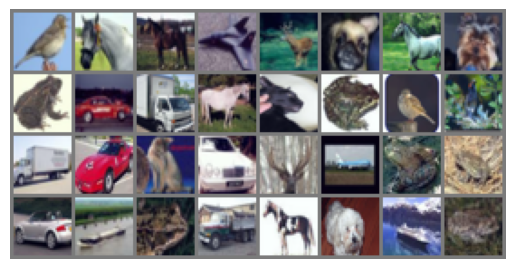

In [10]:
# 데이터 로더에서 데이터셋의 첫 번째 배치를 가져옴
dataiter = iter(train_loader)
images, labels = next(dataiter)

# 이미지를 그리드 형태로 만들기 위해 여러 이미지를 하나로 결합
grid_img = torchvision.utils.make_grid(images) #image: 배치 데이터 텐서, [batch_size, channels, height, width]
                                              #make_grid: 배치 데이터를 배열, 큰이미지로 만듦->시각화에 사용

# 그리드 이미지에서 최대값과 최소값(픽셀값)을 계산
max_val = torch.max(grid_img)
min_val = torch.min(grid_img)

# 그리드 이미지의 데이터 타입, 최대값, 최소값을 정수로 반환하여 출력
print(f'{type(grid_img)=}\n{max_val.item()=}\n{min_val.item()=}')

# 그리드 이미지를 정규화 (값을 0과 1 사이로 조정함)
normalized_grid_img = (grid_img - min_val) / (max_val - min_val)
#min_val을 빼고 max_val-min_val로 나누면 그리드 이미지의 모든 픽셀값이 0,1사이에 위치

# 이미지를 matplotlib를 사용하여 시각화
# 이미지는 (Channels, Height, Width) 형식이므로 (H, W, C) 형식으로 변경함
plt.imshow(np.transpose(normalized_grid_img, (1, 2, 0))) #pit.imshow: 이미지를 화면에 표시
plt.axis('off') #축을 표시하지 않도록 설정
plt.show()# 이미지를 화면에 나타냄

### transpose를 하지 않았을 때


In [11]:

cifar10_train = datasets.CIFAR10(
    data_path,
    train = True,
    download = True,
    # transform = transform,
)


Files already downloaded and verified


In [8]:
img, label = next(iter(cifar10_train))

print(f'{type(img) = }')

type(img) = <class 'PIL.Image.Image'>


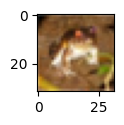

In [9]:
plt.figure(figsize=(1,1))
plt.imshow(np.array(img))

# Train Loop

In [23]:
def train_loop (
    n_epoch,
    train_loader, val_loader,
    model, optimizer, loss_fnc,
    device = 'cpu',):
#log기록을 위한 텐서 초기화
  log_hist = torch.zeros([0,3]).to(device)
  tmp = torch.empty((1, 3), device=log_hist.device)
#모델을 지정된장치(디바이스)로 이동
  model = model.to(device)
  start_time = time.time()  # iteration 시작 시간 기록

  for epoch in range(n_epoch):
    # print(f'\r{epoch:6>}', end='')

    model.train()#모델을 학습모드로 설정
    for x_tensor, y_tensor in train_loader:

      x_tensor = x_tensor.to(device) #중요# device로 보내주는 형태
      y_tensor = y_tensor.to(device)
    #   x_tensor.to(device)
    #   y_tensor.to(device)

      y_pred = model(x_tensor) #모델 예측
      # print(y_tensor.shape)
      loss_train = loss_fnc(y_pred,y_tensor)#학습손실 계산

      if torch.isinf(loss_train):
        print(f'Error: loss is infinity!')
        break

#옵티마이저 초기와, 역전파와 가중치 갱신
      optimizer.zero_grad()
      loss_train.backward()
      optimizer.step()

    with torch.no_grad(): #평가중에는 기울기 계산 x
      model.eval() #모델을 평가모드로 설정
      for x_tensor, y_tensor in val_loader:
        x_tensor = x_tensor.to(device)
        y_tensor = y_tensor.to(device)
        pred = model(x_tensor)
        loss_val = loss_fnc(pred, y_tensor)

    if epoch % 5 == 0:

      # tmp = torch.tensor([epoch, loss_train.item(), loss_val.item()]).to(log_hist.device)
      tmp[0, 0] = epoch
      tmp[0, 1] = loss_train.item()
      tmp[0, 2] = loss_val.item()

      # print(tmp)
      log_hist = torch.concat( (log_hist, tmp.reshape(1,-1)), dim=0 )
      end_time = time.time()  # iteration 종료 시간 기록
      iteration_time = (end_time - start_time)  # 소요 시간을 초 단위로 계산
      print(f'{epoch} Epoch [{iteration_time:.2f}s]/ loss {loss_train.item():.4f} / val_loss {loss_val.item():.4f}')

      start_time = time.time()  # iteration 시작 시간 기록

    if epoch == n_epoch-1:
      tmp[0, 0] = epoch
      tmp[0, 1] = loss_train.item()
      tmp[0, 2] = loss_val.item()
      end_time = time.time()  # iteration 종료 시간 기록
      iteration_time = (end_time - start_time)  # 소요 시간을 초 단위로 계산
      print(f'{epoch} Epoch [{iteration_time:.2f}s] / loss {loss_train.item():.4f} / val_loss {loss_val.item():.4f}')

  return model,log_hist

## Model

In [12]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
  def __init__(self):
    super().__init__()
    #  # 첫 번째 컨볼루션 레이어: 입력 채널 3(r,g,b), 출력 채널 6, 커널 크기 5
    self.conv1 = nn.Conv2d(3, 6, 5) # 32(픽셀)-5(커널크기)+1=32-4=28
    self.pool = nn.MaxPool2d(2, 2) # 풀링 레이어 28/2=14

    # 두 번째 컨볼루션 레이어: Input Channel 6, Output Channel 16, 5by5 kernel
    self.conv2 = nn.Conv2d(6, 16, 5) #14-5+1=10

     # 전결합 레이어: 5 by 5 Input image, 16channels = 16*5*5
    self.fc1 = nn.Linear(16 * 5 * 5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):

    # conv+relu+maxpool2d (2layers)
    x = self.pool(F.relu(self.conv1(x)))
    # conv+relu+maxpool2d (2layers)
    x = self.pool(F.relu(self.conv2(x)))
    # 배치를 제외한 모든 차원을 평탄화(flatten)
    x = torch.flatten(x, 1)

    # 2layers # 전결합 레이어 + ReLU
    x = F.relu(self.fc1(x))
    # 2layers # 전결합 레이어 + ReLU
    x = F.relu(self.fc2(x))
    # 1 layers # 출력 레이어
    x = self.fc3(x)
    return x

# 모델 인스턴스 생성 및 출력
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


- 같은 nn 모델이지만 풀려있는 형태( 컨브가 깊음 )
  -입력 크기 변화:
32x32 -> conv1 -> 28x28 -> pool -> 14x14 -> conv2 -> 10x10 -> pool -> 5x5

In [13]:
#더 복잡한 CNN 모델로, 여러 개의 컨볼루션 레이어와 전결합 레이어로 구성
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1), # 첫 번째 컨볼루션 레이어: 입력 채널 3, 출력 채널 32, 커널 크기 3, 패딩 1
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1), # 두 번째 컨볼루션 레이어: 출력 채널 64, 커널 크기 3, 패딩 1
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16# 풀링 레이어

            # 세 번째 컨볼루션 레이어: 출력 채널 128, 커널 크기 3, 패딩 1
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1), # 64개의 특성을 128개의 필터를 가한후 각각 공간정보 파악
            nn.ReLU(),
              # 네 번째 컨볼루션 레이어: 출력 채널 128, 커널 크기 3, 패딩 1
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            # 풀링 레이어
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            # 다섯 번째 컨볼루션 레이어: 출력 채널 256, 커널 크기 3, 패딩 1
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
             # 여섯 번째 컨볼루션 레이어: 출력 채널 256, 커널 크기 3, 패딩 1
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
             # 풀링 레이어
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            #줄어들음. 압축(?)

            nn.Flatten(), # 평탄화
            nn.Linear(256*4*4, 1024),# 전결합 레이어: 입력 256*4*4, 출력 1024
            nn.ReLU(),
            nn.Linear(1024, 512),# 전결합 레이어: 출력 512
            nn.ReLU(),
            nn.Linear(512, 10))# 출력 레이어: 출력 10

    def forward(self, xb):
        return self.network(xb)

net = Net()
print(net)


Net(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=1024, o

In [14]:

params = list(net.parameters())
print(f'{len(params) = }')
print(params[0].size())



len(params) = 18
torch.Size([32, 3, 3, 3])


In [15]:
# rand input img for test
tmp = torch.randn(1, 3, 32, 32)
out = net(tmp)
print(out)


tensor([[-0.0316,  0.0497,  0.0164, -0.0333, -0.0072,  0.0200,  0.0171,  0.0361,
         -0.0205,  0.0196]], grad_fn=<AddmmBackward0>)


In [16]:
# gradient 를 0으로 초기화
net.zero_grad()
# 무작위 값으로 back propagation for test
out.backward(torch.randn(1,10))

# Training

In [17]:
# device 설정.
device = (
      "cuda" if torch.cuda.is_available()
      else "mps"
      if torch.backends.mps.is_available()
      else "cpu"
  )
print(f"{device=}")


device='cuda'


In [24]:
# number of epochs
n_epoch = 11
# learning ratio
lr = 2e-4 #2*10^-4

# loss function 설정
loss_fnc  = nn.CrossEntropyLoss()

# 모델 생성 및 초기화
model = Net()


# optimizer 생성 및 초기화
optimizer = torch.optim.Adam(model.parameters(), lr=lr) # recommanded

# 경사하강법(SGD) 옵티마이저로, 모델 파라미터의 업데이트를 수행한다.
# net.parameters() : 모델의 학습 가능한 파라미터들을 반환.
# lr : learning rate(학습률)을 나타낸다.
# momentum : 관성을 나타내며, 학습의 안정성과 수렴 속도를 높이는데 도움을 준다.
# optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

m, h = train_loop (
    n_epoch,
    train_loader, valid_loader,
    model, optimizer, loss_fnc,
    device = device)

0 Epoch [20.33s]/ loss 0.9177 / val_loss 1.3082
5 Epoch [97.89s]/ loss 0.4631 / val_loss 0.7807
10 Epoch [99.17s]/ loss 0.1030 / val_loss 1.8021
10 Epoch [0.00s] / loss 0.1030 / val_loss 1.8021


# Laerning Curve

(3, 3)


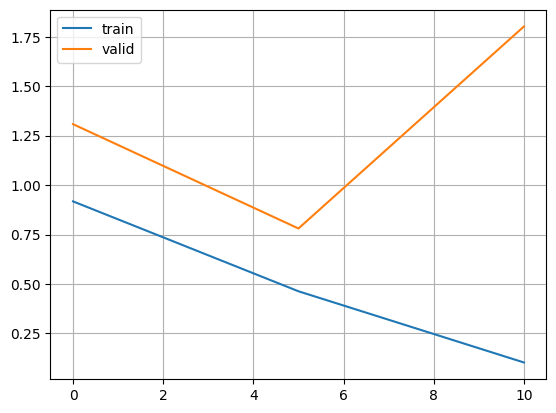

In [25]:
import matplotlib.pyplot as plt

h = h.cpu()
h0 = h.detach().numpy()
print(h0.shape)
plt.plot(h0[:,0], h0[:,1], label='train')
plt.plot(h0[:,0], h0[:,2], label='valid')
plt.legend()
plt.grid()
plt.show()


In [26]:
f_m = model.cpu()
f_m.eval()
with torch.no_grad():
  is_first = True
  for x_tensor, y_tensor in test_loader:
    x_tensor = x_tensor.cpu()
    y_tensor = y_tensor.cpu()
    pred_prob = f_m(x_tensor)
    pred = torch.argmax(pred_prob, dim=-1) # class 수 만큼 나오므로 가장 큰 확률의 index를 얻어야함.

    # print(y_tensor.numpy().shape)
    if is_first:
      test_pred = pred.numpy().copy()
      test_label = y_tensor.numpy().copy()
      is_first = False
    else:
      test_label = np.concatenate((test_label, y_tensor.numpy()), axis=0)
      test_pred = np.concatenate((test_pred, pred.numpy()), axis=0)

print(test_label.shape, test_label.dtype)
print(test_pred.shape, test_pred.dtype)


(10000,) int64
(10000,) int64


In [27]:
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    fbeta_score,
)
pred = test_pred
label = test_label

print('Confusion Matrix\n',
      str(confusion_matrix(label,pred))
      )
print(f'Precision           :{np.round(precision_score(label,pred,average=None),2)}')
print(f'Precision (macro)   :{np.round(precision_score(label,pred,average="macro"),2)}')
print(f'Precision (micro)   :{np.round(precision_score(label,pred,average="micro"),2)}')
print(f'Precision (weighted):{np.round(precision_score(label,pred,average="weighted"),2)}')
print(f'Recall              :{np.round(recall_score(label,pred,average=None),2)}')
print(f'Recall    (macro)   :{np.round(recall_score(label,pred,average="macro"),2)}')
print(f'Recall    (micro)   :{np.round(recall_score(label,pred,average="micro"),2)}')
print(f'Recall    (weighted):{np.round(recall_score(label,pred,average="weighted"),2)}')
print(f'F1-score            :{np.round(f1_score(label,pred,average=None),2)}')
print(f'F1-score  (macro)   :{np.round(f1_score(label,pred,average="macro"),2)}')
print(f'F1-score  (micro)   :{np.round(f1_score(label,pred,average="micro"),2)}')
print(f'F1-score  (weighted):{np.round(f1_score(label,pred,average="weighted"),2)}')
print(f'F2-score            :{np.round(fbeta_score(label,pred,beta=2,average=None),2)}')
print(f'F2-score  (macro)   :{np.round(fbeta_score(label,pred,beta=2,average="macro"),2)}')
print(f'F2-score  (micro)   :{np.round(fbeta_score(label,pred,beta=2,average="micro"),2)}')
print(f'F2-score  (weighted):{np.round(fbeta_score(label,pred,beta=2,average="weighted"),2)}')

#83까지 나오기도함

Confusion Matrix
 [[791  22  50  22  15   8  18   7  28  39]
 [  7 897   4   5   1   2  14   0  17  53]
 [ 33   4 658  54  82  50  75  27   6  11]
 [ 19   5  48 583  66 135  89  31  11  13]
 [  7   1  36  40 800  21  46  43   5   1]
 [  7   3  19 164  52 659  36  52   2   6]
 [  2   0  21  43  26  11 890   3   4   0]
 [  2   1  16  24  65  32  11 835   4  10]
 [ 67  19  13  10   6   3  22   4 833  23]
 [ 17  61   3  18   4   5  10   9   5 868]]
Precision           :[0.83 0.89 0.76 0.61 0.72 0.71 0.73 0.83 0.91 0.85]
Precision (macro)   :0.78
Precision (micro)   :0.78
Precision (weighted):0.78
Recall              :[0.79 0.9  0.66 0.58 0.8  0.66 0.89 0.84 0.83 0.87]
Recall    (macro)   :0.78
Recall    (micro)   :0.78
Recall    (weighted):0.78
F1-score            :[0.81 0.89 0.7  0.59 0.76 0.68 0.81 0.83 0.87 0.86]
F1-score  (macro)   :0.78
F1-score  (micro)   :0.78
F1-score  (weighted):0.78
F2-score            :[0.8  0.89 0.68 0.59 0.78 0.67 0.85 0.83 0.85 0.86]
F2-score  (macro)   :0.78